In [4]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
# 머신러닝모델 라이브러리 LGBM, XGBOOST, CATBOOST, RANDOM FOREST, DECISION TREE 
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split

import shap
from sklearn.feature_selection import SequentialFeatureSelector

### 1. HoBo (standard)

In [6]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### lgbm

In [7]:
# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1225
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
RMSE: 592.5308805294699
MDAPE: 55.90465842529353


In [8]:
feature_importance = pd.DataFrame(model_lgbm.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Industry_Status,442
Age,411
Occupation_Status,309
Education_Status,222
Dividends,219
Working_Week (Yearly),140
revenue,135
Income_Status,114
profit,103
Employment_Status,80


<function matplotlib.pyplot.show(close=None, block=None)>

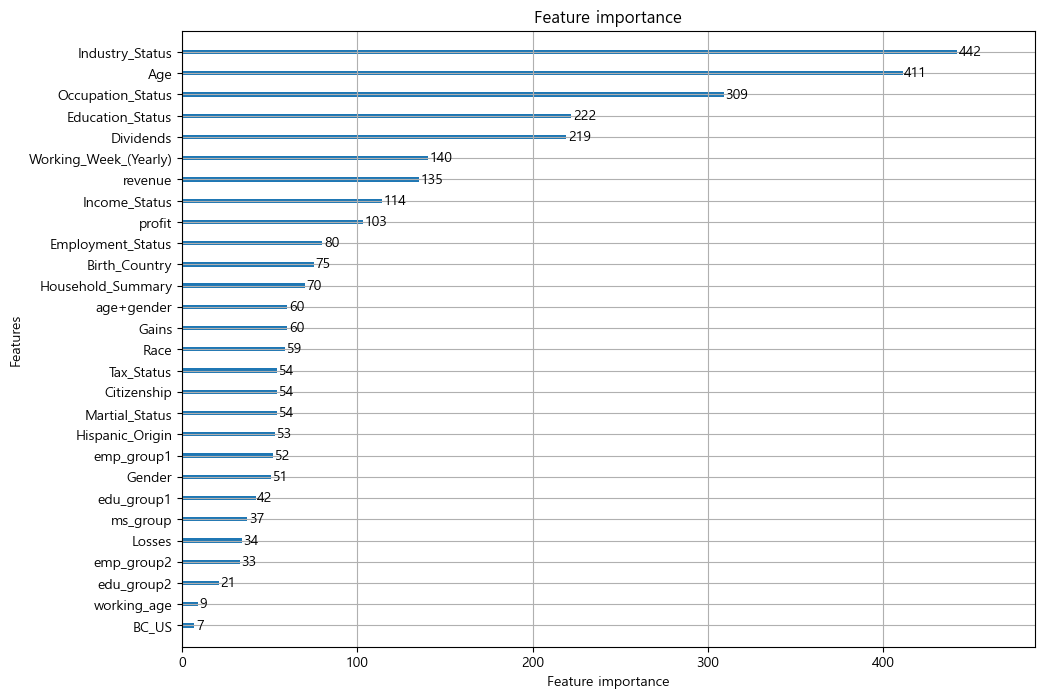

In [9]:
lgb.plot_importance(model_lgbm, max_num_features=33, figsize=(11, 8))
plt.show

제거하면서 성능 비교

In [10]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Dividends',
       'Income_Status', 'revenue', 'profit', 'working_age', 
       'Gender', 'emp_group1', 'Hispanic_Origin', 'age+gender']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 22
[LightGBM] [Info] Start training from score 556.153500
RMSE: 594.5934073446624
MDAPE: 56.90984828371188


#### xgb

In [11]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 612.696178543301
MDAPE: 63.47587768015745


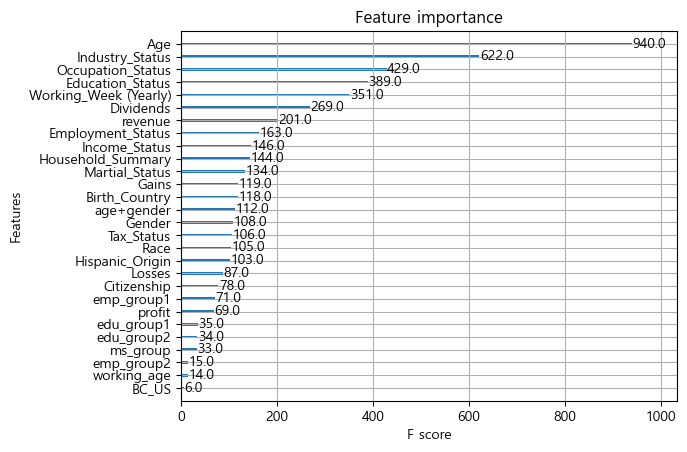

In [13]:
xgb.plot_importance(model_xgb, max_num_features=len(X_train.columns))
plt.show()

In [14]:
# 모든 변수의 변수 중요도 값을 출력
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')

print("Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importance:
Age: 940.0
Industry_Status: 622.0
Occupation_Status: 429.0
Education_Status: 389.0
Working_Week (Yearly): 351.0
Dividends: 269.0
revenue: 201.0
Employment_Status: 163.0
Income_Status: 146.0
Household_Summary: 144.0
Martial_Status: 134.0
Gains: 119.0
Birth_Country: 118.0
age+gender: 112.0
Gender: 108.0
Tax_Status: 106.0
Race: 105.0
Hispanic_Origin: 103.0
Losses: 87.0
Citizenship: 78.0
emp_group1: 71.0
profit: 69.0
edu_group1: 35.0
edu_group2: 34.0
ms_group: 33.0
emp_group2: 15.0
working_age: 14.0
BC_US: 6.0


제거하면서 성능 비교

In [15]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Martial_Status', 'Household_Summary',
       'Gains', 'Dividends',
       'Income_Status', 'revenue']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 619.2071424616256
MDAPE: 66.15918616092567


#### catboost

In [16]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 595.8876486445118
MDAPE: 56.60711347923595


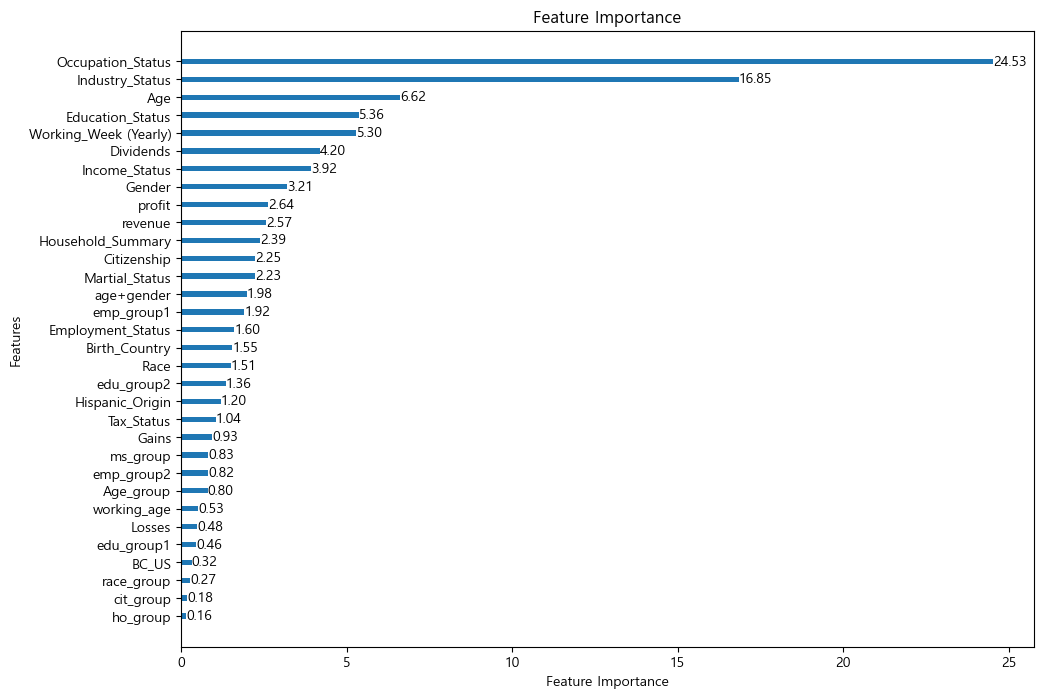

In [18]:
from catboost import Pool

# CatBoost 모델의 feature importance 가져오기
feature_importance = model_catb.get_feature_importance(
    data=Pool(X_train, label=y_train),
    type='PredictionValuesChange'
)

# 특성 중요도를 기준으로 내림차순으로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 상위 n개의 특성만 선택하여 시각화
top_n = 33
sorted_idx = sorted_idx[:top_n]
sorted_feature_importance = feature_importance[sorted_idx]

# 특성 이름 가져오기
feature_names = X_train.columns

# 상위 n개 특성 이름 가져오기
sorted_feature_names = feature_names[sorted_idx]

# 시각화
plt.figure(figsize=(11, 8))
bars = plt.barh(range(len(sorted_idx)), sorted_feature_importance[::-1], align='center', height=0.3)
plt.yticks(range(len(sorted_idx)), sorted_feature_names[::-1]) # 내림차순으로 변경
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# 막대 그래프 위에 값 표시
for bar, importance in zip(bars, sorted_feature_importance[::-1]): # 내림차순으로 변경
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()


In [19]:
feature_importance = pd.DataFrame(model_catb.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Occupation_Status,24.527327
Industry_Status,16.848971
Age,6.624012
Education_Status,5.362442
Working_Week (Yearly),5.299510
Dividends,4.198394
Income_Status,3.919207
Gender,3.206578
profit,2.635945
revenue,2.569630


제거하면서 성능 비교

In [20]:
df1 = pd.read_csv("train_df1_standard.csv")

X_features = ['Age', 'Education_Status', 'Working_Week (Yearly)',
       'Industry_Status', 'Occupation_Status']

X = df1[X_features] 
y = df1['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 605.1851882445915
MDAPE: 58.636820756696515


### 2. HoBx (minmax)

In [21]:
df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### lgb

In [22]:
# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
RMSE: 593.1119000253949
MDAPE: 56.53244229902587


<function matplotlib.pyplot.show(close=None, block=None)>

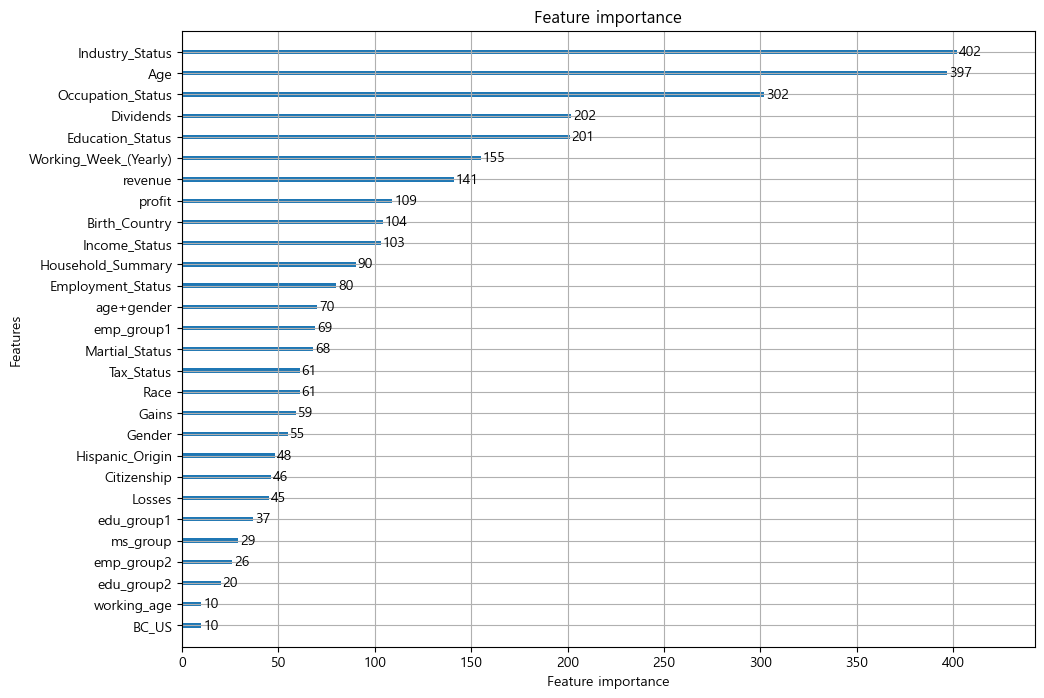

In [23]:
lgb.plot_importance(model_lgbm, max_num_features=33, figsize=(11, 8))
plt.show

In [24]:
feature_importance = pd.DataFrame(model_lgbm.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Industry_Status,402
Age,397
Occupation_Status,302
Dividends,202
Education_Status,201
Working_Week (Yearly),155
revenue,141
profit,109
Birth_Country,104
Income_Status,103


변수 삭제하면서 비교

In [25]:
df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Education_Status', 
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Dividends',
       'revenue']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 7
[LightGBM] [Info] Start training from score 556.153500
RMSE: 598.1449302208798
MDAPE: 56.54984192051948


#### xgb

In [26]:
df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 616.0406404966501
MDAPE: 63.5856343223935


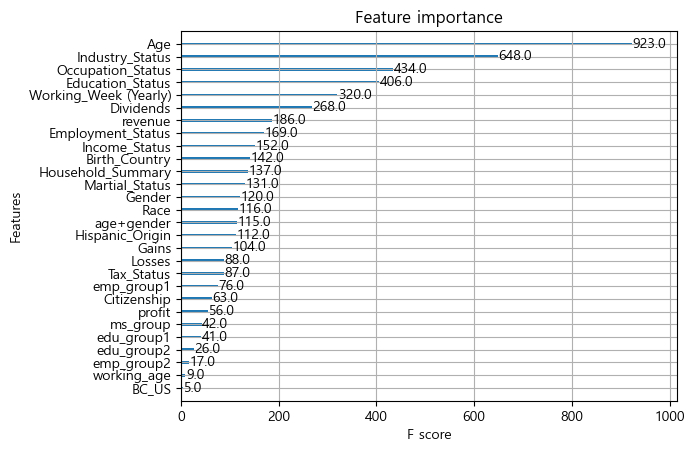

In [28]:
# fig, ax = plt.subplots(figsize=(11, 8))
# xgb.plot_importance(model_xgb, ax=ax, max_num_features=33)
# plt.show()

xgb.plot_importance(model_xgb, max_num_features=len(X_train.columns))
plt.show()

In [29]:
# 모든 변수의 변수 중요도 값을 출력
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')

print("Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importance:
Age: 923.0
Industry_Status: 648.0
Occupation_Status: 434.0
Education_Status: 406.0
Working_Week (Yearly): 320.0
Dividends: 268.0
revenue: 186.0
Employment_Status: 169.0
Income_Status: 152.0
Birth_Country: 142.0
Household_Summary: 137.0
Martial_Status: 131.0
Gender: 120.0
Race: 116.0
age+gender: 115.0
Hispanic_Origin: 112.0
Gains: 104.0
Losses: 88.0
Tax_Status: 87.0
emp_group1: 76.0
Citizenship: 63.0
profit: 56.0
ms_group: 42.0
edu_group1: 41.0
edu_group2: 26.0
emp_group2: 17.0
working_age: 9.0
BC_US: 5.0


변수 삭제하면서 비교

In [30]:
df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Dividends',
       'Income_Status', 'revenue']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 618.1975241729291
MDAPE: 63.764421316293564


#### catboost

In [31]:
df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 594.2040380826561
MDAPE: 56.45190457522027


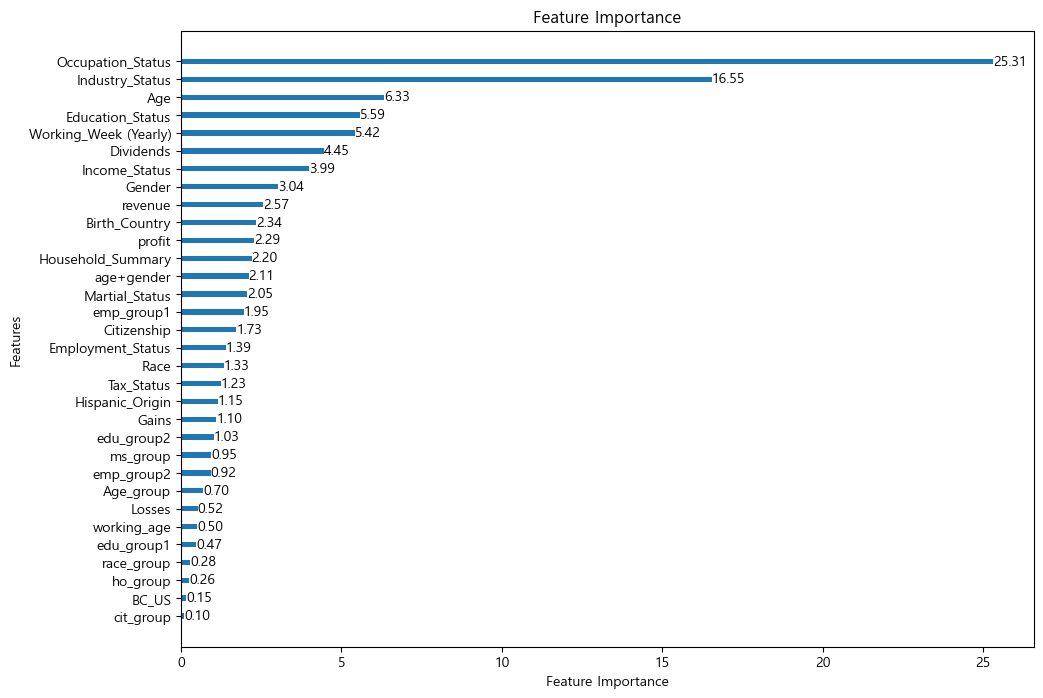

In [33]:
from catboost import Pool

# CatBoost 모델의 feature importance 가져오기
feature_importance = model_catb.get_feature_importance(
    data=Pool(X_train, label=y_train),
    type='PredictionValuesChange'
)

# 특성 중요도를 기준으로 내림차순으로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 상위 n개의 특성만 선택하여 시각화
top_n = 33
sorted_idx = sorted_idx[:top_n]
sorted_feature_importance = feature_importance[sorted_idx]

# 특성 이름 가져오기
feature_names = X_train.columns

# 상위 n개 특성 이름 가져오기
sorted_feature_names = feature_names[sorted_idx]

# 시각화
plt.figure(figsize=(11, 8))
bars = plt.barh(range(len(sorted_idx)), sorted_feature_importance[::-1], align='center', height=0.3)
plt.yticks(range(len(sorted_idx)), sorted_feature_names[::-1]) # 내림차순으로 변경
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# 막대 그래프 위에 값 표시
for bar, importance in zip(bars, sorted_feature_importance[::-1]): # 내림차순으로 변경
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [34]:
feature_importance = pd.DataFrame(model_catb.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Occupation_Status,25.308193
Industry_Status,16.550898
Age,6.328991
Education_Status,5.586618
Working_Week (Yearly),5.423443
Dividends,4.450747
Income_Status,3.992412
Gender,3.035398
revenue,2.565971
Birth_Country,2.337788


변수 삭제하면서 수정

In [35]:

df2 = pd.read_csv("train_df2_minmax.csv")

X_features = ['Age', 'Education_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Dividends',
       'Income_Status']

X = df2[X_features] 
y = df2['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 607.5481946395794
MDAPE: 57.73127478847941


### 3. HxBo (robust)

In [36]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### lgb

In [37]:
# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
RMSE: 589.6032930437971
MDAPE: 55.78682665184513


<function matplotlib.pyplot.show(close=None, block=None)>

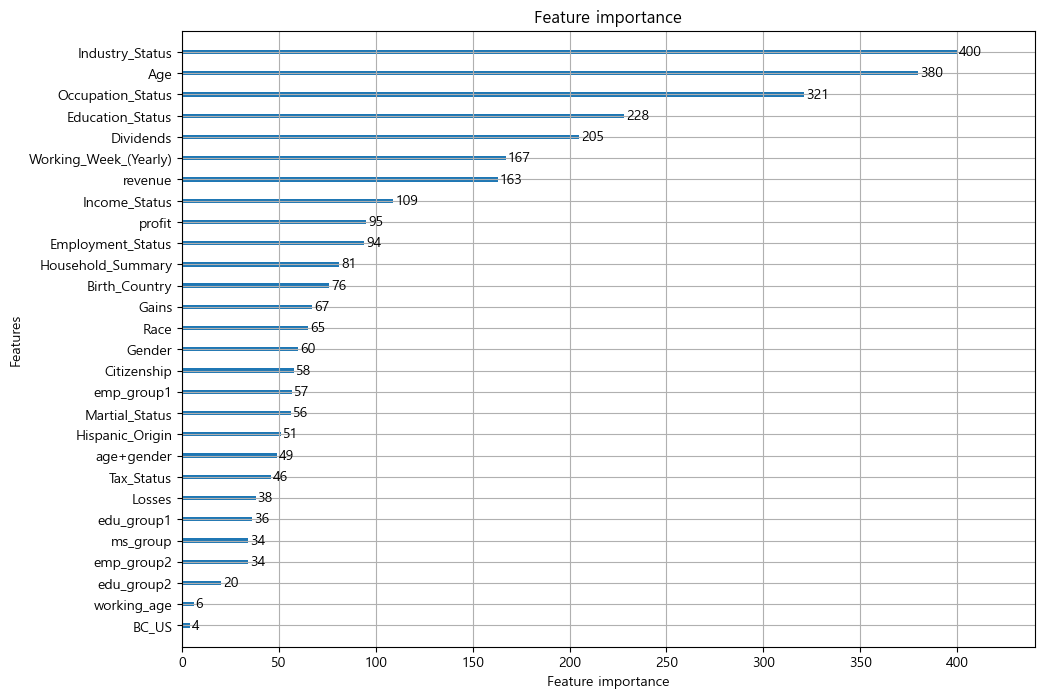

In [38]:
lgb.plot_importance(model_lgbm, max_num_features=33, figsize=(11, 8))
plt.show

In [39]:
feature_importance = pd.DataFrame(model_lgbm.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Industry_Status,400
Age,380
Occupation_Status,321
Education_Status,228
Dividends,205
Working_Week (Yearly),167
revenue,163
Income_Status,109
profit,95
Employment_Status,94


변수 삭제하면서 비교

In [40]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Household_Summary', 'Birth_Country', 'Dividends',
       'Income_Status', 'revenue', 'profit']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1013
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 556.153500
RMSE: 598.0825953877103
MDAPE: 57.45160369228002


#### xgb

In [41]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 615.0390094402716
MDAPE: 62.974723815917976


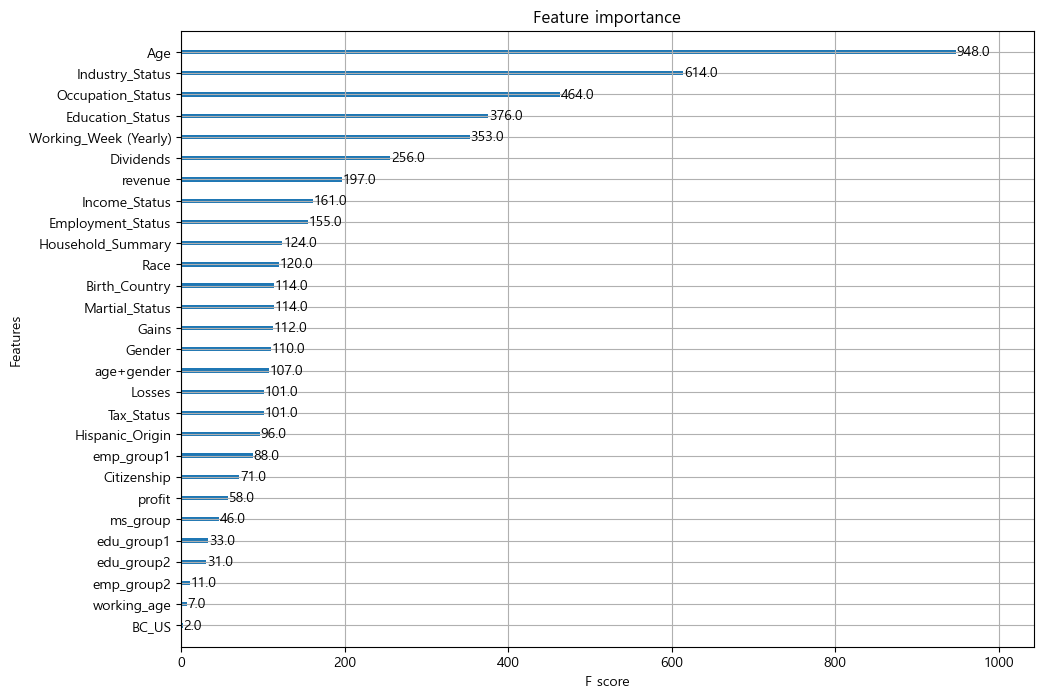

In [43]:
fig, ax = plt.subplots(figsize=(11, 8))
xgb.plot_importance(model_xgb, ax=ax, max_num_features=33)
plt.show()

In [44]:
# 모든 변수의 변수 중요도 값을 출력
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')

print("Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importance:
Age: 948.0
Industry_Status: 614.0
Occupation_Status: 464.0
Education_Status: 376.0
Working_Week (Yearly): 353.0
Dividends: 256.0
revenue: 197.0
Income_Status: 161.0
Employment_Status: 155.0
Household_Summary: 124.0
Race: 120.0
Martial_Status: 114.0
Birth_Country: 114.0
Gains: 112.0
Gender: 110.0
age+gender: 107.0
Tax_Status: 101.0
Losses: 101.0
Hispanic_Origin: 96.0
emp_group1: 88.0
Citizenship: 71.0
profit: 58.0
ms_group: 46.0
edu_group1: 33.0
edu_group2: 31.0
emp_group2: 11.0
working_age: 7.0
BC_US: 2.0


변수 삭제하면서 비교

In [45]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Household_Summary',
       'Dividends',
       'Income_Status', 'revenue']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 621.3154921174786
MDAPE: 65.915040273515


#### catboost

In [46]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 595.2389024693938
MDAPE: 56.65988700368947


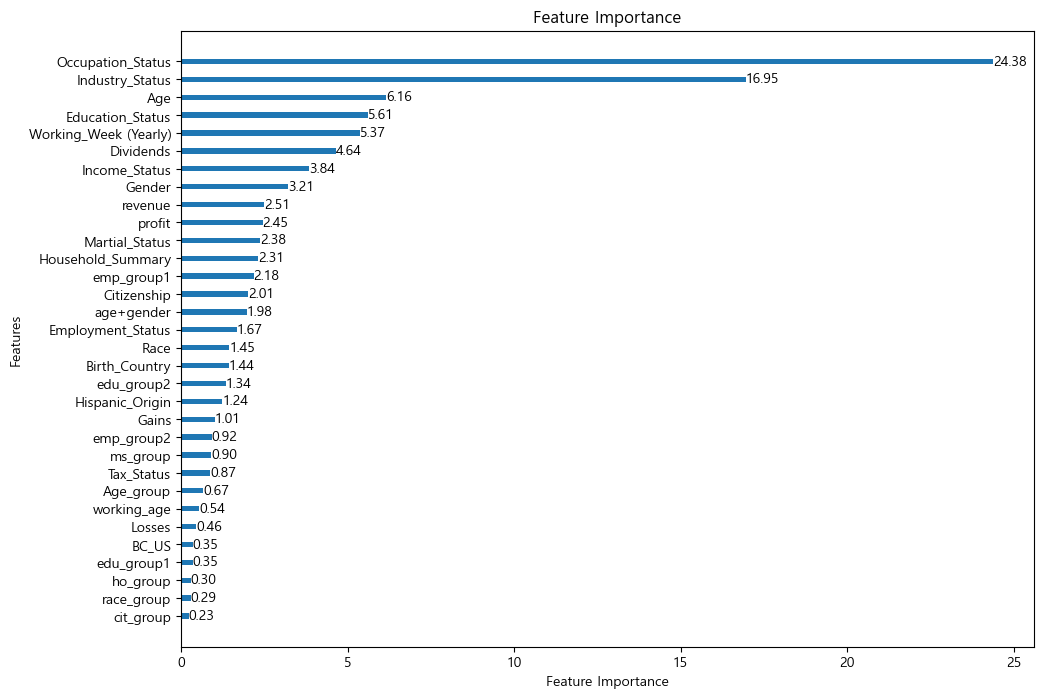

In [48]:
from catboost import Pool

# CatBoost 모델의 feature importance 가져오기
feature_importance = model_catb.get_feature_importance(
    data=Pool(X_train, label=y_train),
    type='PredictionValuesChange'
)

# 특성 중요도를 기준으로 내림차순으로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 상위 n개의 특성만 선택하여 시각화
top_n = 33
sorted_idx = sorted_idx[:top_n]
sorted_feature_importance = feature_importance[sorted_idx]

# 특성 이름 가져오기
feature_names = X_train.columns

# 상위 n개 특성 이름 가져오기
sorted_feature_names = feature_names[sorted_idx]

# 시각화
plt.figure(figsize=(11, 8))
bars = plt.barh(range(len(sorted_idx)), sorted_feature_importance[::-1], align='center', height=0.3)
plt.yticks(range(len(sorted_idx)), sorted_feature_names[::-1]) # 내림차순으로 변경
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# 막대 그래프 위에 값 표시
for bar, importance in zip(bars, sorted_feature_importance[::-1]): # 내림차순으로 변경
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [49]:
feature_importance = pd.DataFrame(model_catb.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Occupation_Status,24.381205
Industry_Status,16.953586
Age,6.160221
Education_Status,5.606406
Working_Week (Yearly),5.367934
Dividends,4.642683
Income_Status,3.842349
Gender,3.210529
revenue,2.505348
profit,2.447025


변수 삭제하면서 비교

In [50]:
df3 = pd.read_csv("train_df3_robust.csv")

X_features = ['Age', 'Gender', 'Education_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Martial_Status', 'Household_Summary', 'Citizenship',
       'Dividends',
       'Income_Status', 'revenue', 'profit',
       'emp_group1']

X = df3[X_features] 
y = df3['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 602.2075255342482
MDAPE: 56.832135779593095


### 4. HxBx (스케일러 x)

In [51]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### lgb

In [52]:
# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
RMSE: 593.2445626165172
MDAPE: 56.51797132124054


<function matplotlib.pyplot.show(close=None, block=None)>

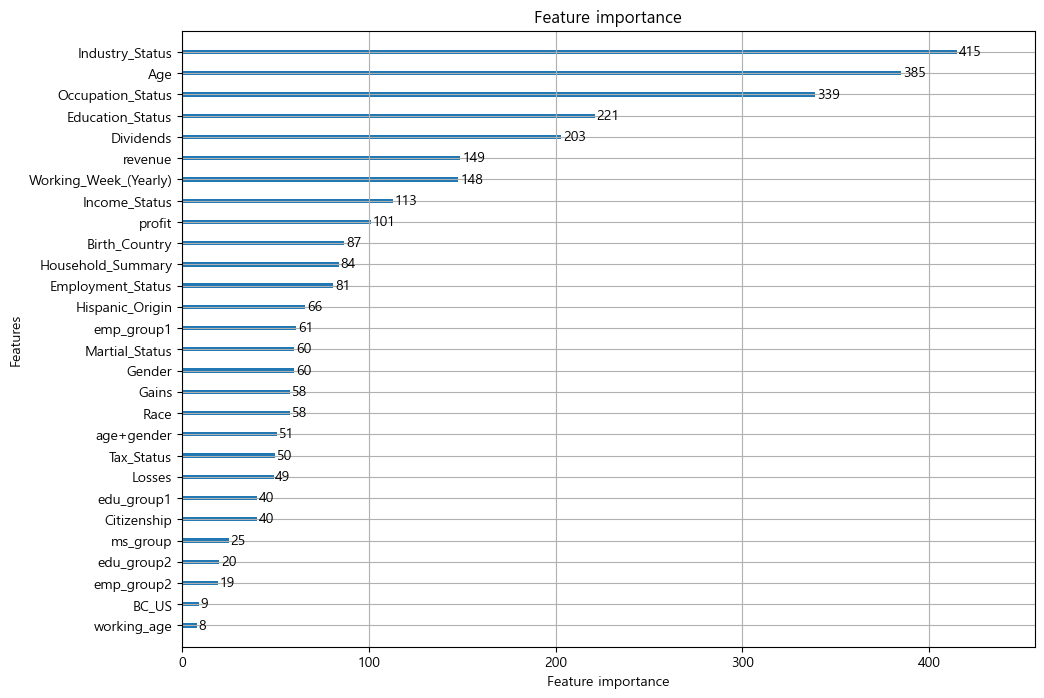

In [53]:
lgb.plot_importance(model_lgbm, max_num_features=33, figsize=(11, 8))
plt.show

In [54]:
feature_importance = pd.DataFrame(model_lgbm.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Industry_Status,415
Age,385
Occupation_Status,339
Education_Status,221
Dividends,203
revenue,149
Working_Week (Yearly),148
Income_Status,113
profit,101
Birth_Country,87


In [55]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Household_Summary',
       'Birth_Country', 'Dividends',
       'Income_Status', 'revenue', 'profit']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 정의
model_lgbm = lgb.LGBMRegressor()
# 모델 학습
model_lgbm.fit(X_train, y_train)
# 예측
y_pred = model_lgbm.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 556.153500
RMSE: 596.7519288545043
MDAPE: 57.18363368216319


#### xgb

In [56]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)


RMSE: 607.9478263515218
MDAPE: 62.85166831468795


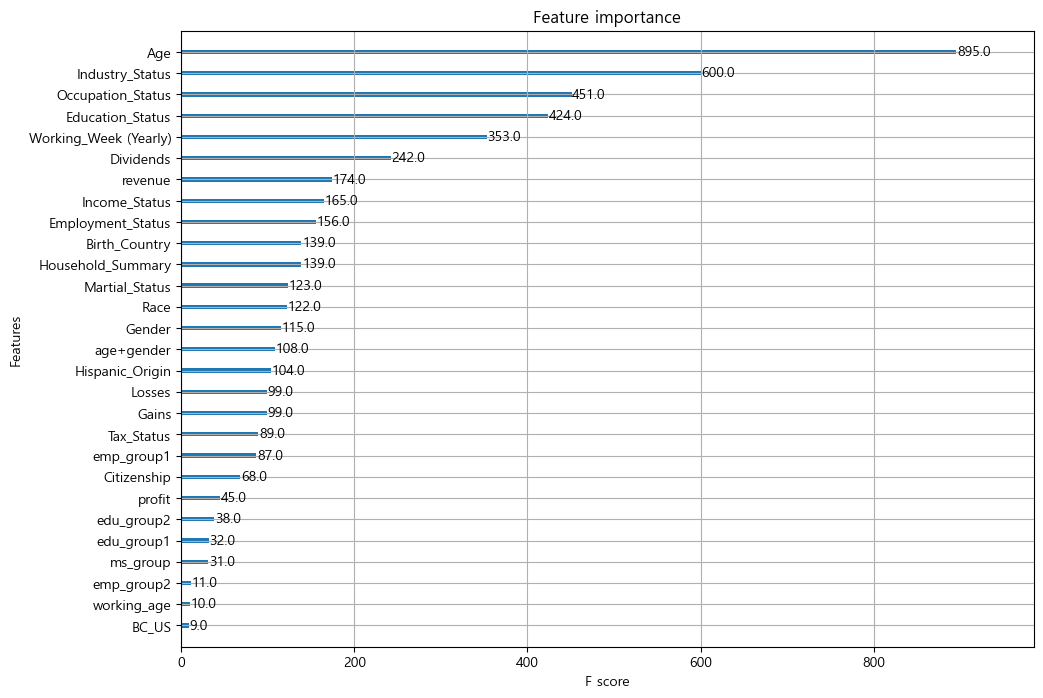

In [58]:
fig, ax = plt.subplots(figsize=(11, 8))
xgb.plot_importance(model_xgb, ax=ax, max_num_features=33)
plt.show()

In [59]:
# 모든 변수의 변수 중요도 값을 출력
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')

print("Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importance:
Age: 895.0
Industry_Status: 600.0
Occupation_Status: 451.0
Education_Status: 424.0
Working_Week (Yearly): 353.0
Dividends: 242.0
revenue: 174.0
Income_Status: 165.0
Employment_Status: 156.0
Household_Summary: 139.0
Birth_Country: 139.0
Martial_Status: 123.0
Race: 122.0
Gender: 115.0
age+gender: 108.0
Hispanic_Origin: 104.0
Gains: 99.0
Losses: 99.0
Tax_Status: 89.0
emp_group1: 87.0
Citizenship: 68.0
profit: 45.0
edu_group2: 38.0
edu_group1: 32.0
ms_group: 31.0
emp_group2: 11.0
working_age: 10.0
BC_US: 9.0


In [60]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status',
       'Dividends',
       'Income_Status', 'revenue']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의
model_xgb = xgb.XGBRegressor()
# 모델 학습
model_xgb.fit(X_train, y_train)
# 예측
y_pred = model_xgb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 618.1975241729291
MDAPE: 63.764421316293564


#### catboost

In [61]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'BC_US', 'Age_group', 'revenue', 'profit',
       'working_age', 'age+gender', 'edu_group1', 'edu_group2', 'emp_group1',
       'emp_group2', 'ms_group', 'cit_group', 'ho_group', 'race_group']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 593.7437010482397
MDAPE: 56.78531650308927


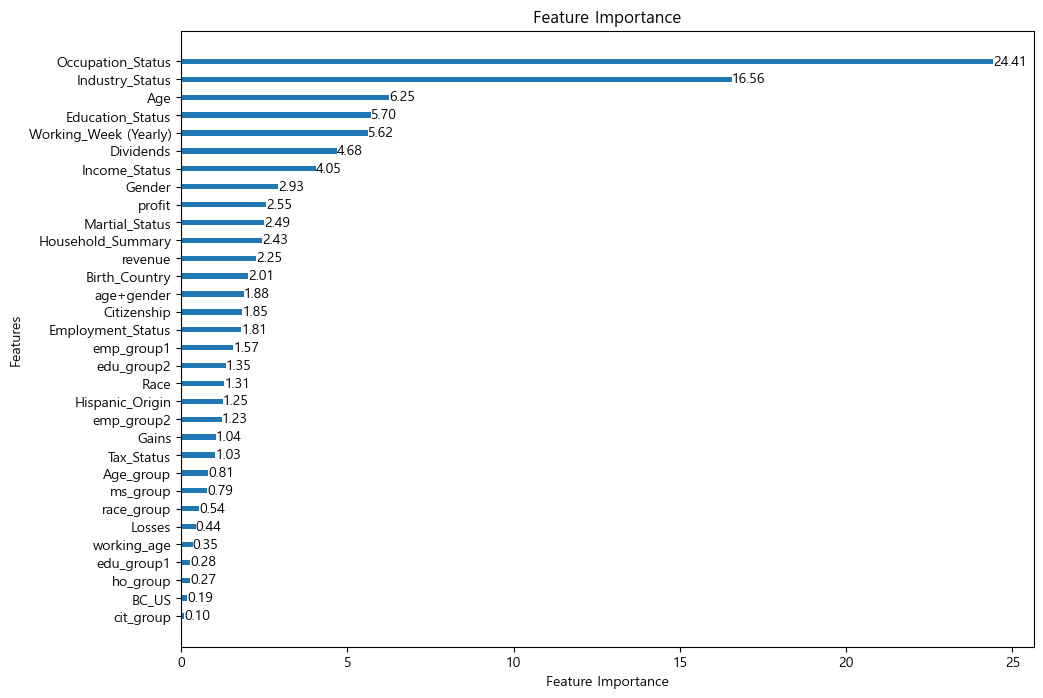

In [63]:
from catboost import Pool

# CatBoost 모델의 feature importance 가져오기
feature_importance = model_catb.get_feature_importance(
    data=Pool(X_train, label=y_train),
    type='PredictionValuesChange'
)

# 특성 중요도를 기준으로 내림차순으로 정렬
sorted_idx = np.argsort(feature_importance)[::-1]

# 상위 n개의 특성만 선택하여 시각화
top_n = 33
sorted_idx = sorted_idx[:top_n]
sorted_feature_importance = feature_importance[sorted_idx]

# 특성 이름 가져오기
feature_names = X_train.columns

# 상위 n개 특성 이름 가져오기
sorted_feature_names = feature_names[sorted_idx]

# 시각화
plt.figure(figsize=(11, 8))
bars = plt.barh(range(len(sorted_idx)), sorted_feature_importance[::-1], align='center', height=0.3)
plt.yticks(range(len(sorted_idx)), sorted_feature_names[::-1]) # 내림차순으로 변경
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# 막대 그래프 위에 값 표시
for bar, importance in zip(bars, sorted_feature_importance[::-1]): # 내림차순으로 변경
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [64]:
feature_importance = pd.DataFrame(model_catb.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,importance
Occupation_Status,24.412209
Industry_Status,16.562221
Age,6.248444
Education_Status,5.699234
Working_Week (Yearly),5.624138
Dividends,4.676630
Income_Status,4.046216
Gender,2.928115
profit,2.545876
Martial_Status,2.491264


In [65]:
df4 = pd.read_csv("train_df4.csv")

X_features = ['Age', 'Education_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status']

X = df4[X_features] 
y = df4['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost 모델 정의
model_catb = CatBoostRegressor()
# 모델 학습
model_catb.fit(X_train, y_train, verbose=False)
# 예측
y_pred = model_catb.predict(X_test)


# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MDAPE 계산
mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MDAPE:",mdape)

RMSE: 605.1851882445915
MDAPE: 58.636820756696515
